In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [9]:
# Load the Datasets

X, y = make_classification(n_samples=1000, n_features=2, n_informative=1, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=42, class_sep=2.0)

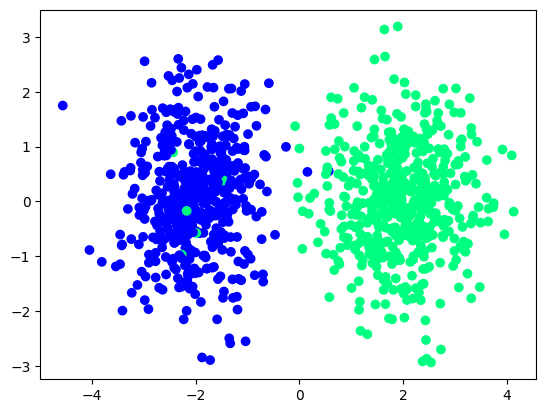

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter")

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
def sigmoid(z):

    return 1 / (1 + np.exp(-z))

In [64]:
class Perceptron_trick():

    def __init__(self, learning_rate, epochs):

        self.coef_ = None
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)
        self.coef_ = np.random.randn(X_train.shape[1]) * 0.01

        for i in range(self.epochs):

            idx = np.random.randint(X_train.shape[0]) 

            y_hat = np.dot(X_train[idx], self.coef_)
            
            error = y_train[idx] - y_hat

            coef_slope = sigmoid(np.dot(error, X_train[idx]))

            self.coef_ = self.coef_ + self.lr * coef_slope
        
        print(f"Coef_: {self.coef_}")
    
    def predict(self, X_test):

        X_test = np.insert(X_test, 0, 1, axis=1)

        y_pred = sigmoid(np.dot(X_test, self.coef_))
        return (y_pred >= 0.5).astype(int)


In [65]:
percp_ = Perceptron_trick(learning_rate=0.001, epochs=1000)

In [66]:
percp_.fit(X_train, y_train)

Coef_: [0.55474349 0.46436867 0.44866286]


In [67]:
y_pred = percp_.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test, y_pred)

In [69]:
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.845
